# Random Walks 

Once again, a notebook dedicated to the ultimate Random Walks implementation.

# Preliminaries

In [1]:
import numpy as np
import networkx as nx

In [2]:
from mercs import Mercs
from mercs.tests.setup import default_dataset
from mercs.composition import CompositeModel
from mercs.graph import model_to_graph
from mercs.graph import compose_all, add_merge_nodes
from mercs.algo.inference import dask_inference_algorithm

# Train

In [3]:
m_small = Mercs(
    random_state=100,
    prediction_algorithm="it",
    clf_criterion="entropy",
    rgr_criterion="mae",
    selection_algorithm="random",
    nb_iterations=5,
    fraction_missing=0.5,
    max_depth=4,
    regression_max_depth=4,
)

X_train, X_test = default_dataset()

m_small.fit(X_train, nominal_attributes={7})

## IT

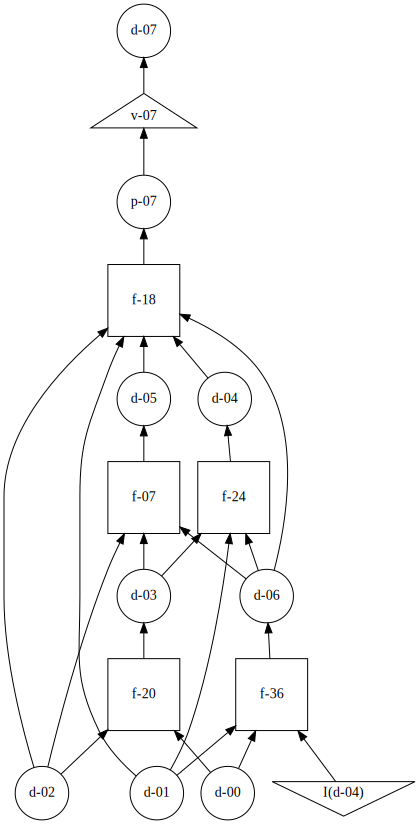

In [4]:
q_code = np.array([0, 0, 0, -1, -1, -1, -1, 1])

y_pred = m_small.predict(X_test, q_code=q_code, prediction_algorithm="it-new")
m_small.show_q_diagram()

In [5]:
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])

## RW

['d-01', 'd-02', 'd-03', 'd-07', 'd-06', 'f-06']
{1, 2, 3, 7} {6}
['d-00', 'd-04', 'd-06', 'd-07', 'f-10', 'p-07', 'v-07']
{0, 4, 6} {7}
['d-00', 'd-01', 'd-04', 'd-06', 'd-07', 'd-03', 'f-33']
{0, 1, 4, 6, 7} {3}
['d-00', 'd-01', 'd-03', 'd-05', 'd-06', 'd-07', 'f-29', 'p-07', 'v-07']
{0, 1, 3, 5, 6} {7}


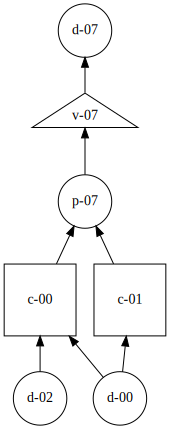

In [15]:
q_code = np.array([0, -1, 0, -1, -1, -1, -1, 1])
y_pred = m_small.predict(X_test, q_code=q_code, prediction_algorithm="rw-new", max_steps=2, nb_walks=2, random_state=601)
m_small.show_q_diagram()

In [18]:
m_small.q_diagrams[0].nodes()

NodeView(('d-02', 'd-06', 'f-06', 'I(d-01)', 'I(d-03)', 'I(d-07)', 'd-00', 'd-07', 'f-10', 'p-07', 'v-07', 'I(d-04)'))

In [20]:
m_small.q_diagrams[1].nodes()

NodeView(('d-00', 'd-03', 'f-33', 'I(d-06)', 'I(d-01)', 'I(d-07)', 'I(d-04)', 'd-07', 'f-29', 'p-07', 'v-07', 'I(d-05)'))

In [23]:
m_small.q_models[0].predict_proba.compute()[:10]

array([[0.25423729, 0.74576271],
       [0.25423729, 0.74576271],
       [0.25423729, 0.74576271],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25423729, 0.74576271],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25423729, 0.74576271],
       [0.25423729, 0.74576271]])

In [24]:
m_small.q_models[1].predict_proba.compute()[:10]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.36904762, 0.63095238],
       [0.36904762, 0.63095238],
       [1.        , 0.        ],
       [0.36904762, 0.63095238],
       [0.36904762, 0.63095238],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [25]:
m_small.q_model.predict_proba.compute()[:10]

array([[1.25423729, 0.74576271],
       [1.25423729, 0.74576271],
       [1.25423729, 0.74576271],
       [0.36904762, 1.63095238],
       [0.36904762, 1.63095238],
       [1.25423729, 0.74576271],
       [0.36904762, 1.63095238],
       [0.36904762, 1.63095238],
       [1.25423729, 0.74576271],
       [1.25423729, 0.74576271]])

In [7]:
y_pred

array([0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

# Recursion

In [8]:
cm = CompositeModel(m_small.q_diagram)
types = m_small._get_types(m_small.metadata)

In [9]:
cm.predict.compute()

array([0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

In [10]:
m_small.q_diagram.nodes['d-07']

{'kind': 'data',
 'idx': 7,
 'tgt': [7],
 'type': 'nominal',
 'shape': '"circle"',
 'dask': Delayed('select-570b82a9-dca6-48a0-9034-186b3a60980e')}

In [11]:
g1 = model_to_graph(cm, types, idx=99, composition=True)
g2 = model_to_graph(cm, types, idx=100, composition=True)

In [12]:
def collapse_graph(g, types, idx=0):
    dask_inference_algorithm(g, X=None, sorted_nodes=None)
    cm = CompositeModel(g_walk)
    return model_to_graph(cm, types, idx=idx, composition=True)

def filter_nodes(g):
    sorted_nodes = list(nx.topological_sort(g))
    filtered_nodes = []
    for n in reversed(sorted_nodes):
        if g.nodes[n]["kind"] == 'model': break
        filtered_nodes.append(n)
    filtered_nodes = list(reversed(filtered_nodes))
    return filtered_nodes

In [13]:
def merge_walks(walks):
    g = compose_all(walks)
    filtered_nodes = filter_nodes(g)

    dask_inference_algorithm(g, sorted_nodes=filtered_nodes)
    return g

In [14]:
walks = [collapse_walk(g_walk, types, idx=idx+100) for idx, g_walk in enumerate([m_small.q_diagram]*20)]
g = merge_walks(walks)

NameError: name 'collapse_walk' is not defined

In [ ]:
g.nodes['p-07']['dask'].compute()

In [ ]:
o = g1.nodes['c-99']
o

In [ ]:
for n,d in m_small.q_diagram.nodes(data=True):
    if d.get("function", None) is not None:
        print(n)

In [ ]:
g = compose_all([g1,g2])
g.nodes

In [ ]:
sorted_nodes = list(nx.topological_sort(g))
sorted_nodes

In [ ]:
g.nodes['c-99']

In [ ]:
filtered_nodes = []
for n in reversed(sorted_nodes):
    if g.nodes[n]["kind"] == 'model': break
    filtered_nodes.append(n)
filtered_nodes = list(reversed(filtered_nodes))
filtered_nodes

In [ ]:
functions = dask_inference_algorithm(g, sorted_nodes=filtered_nodes)

In [ ]:
g.nodes['p-07']["dask"].compute()

In [ ]:
functions['p-07'].compute()